<a href="https://colab.research.google.com/github/Pablo-AS35/Accidentes2022-2024/blob/main/ProyectoDSParteI_PabloArce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Análisis de Accidentes de Tránsito en 8 países, incidencias de los diferentes factores que se ven involucrados en su ocurrencia. **

**1. Introducción**

Los accidentes de tránsito en general representan una cantidad importante de heridos y fallecidos en el mundo, donde se ven involucrados pasajeros de los vehículos involucrados, peatones y ciclistas. Entre 2020 y 2024, países como Brasil, Rusia, China, Estados Unidos, Reino Unido, India, Japón y Canadá han registrado un alto número de accidentes de tránsito, cada uno con factores específicos que influyen en su ocurrencia, como las condiciones climáticas, la velocidad que transitaban los vehículos que provocaron el accidente, entre otros.
Este proyecto, busca analizar la implicancia que tienen los diversos factores que condicionan la ocurrencia de los accidentes, donde cada accidente tiene su tipo de gravedad y, además en cada accidente se ven involucradas personas, teniendo como resultado número de heridos y fallecidos. Los factores que se analizaran son: el horario de ocurrencia de accidentes (mañana, tarde, noche), la zona de ocurrencia (rural o urbana), el tipo de camino donde ocurren los accidentes, las condiciones climáticas de cuando ocurrió el accidente, el sexo y edad del conductor que provoca el accidente, y las causas del accidente.

**2. Objetivo del Proyecto**

El objetivo del presente proyecto, es analizar los impactos en la gravedad de los accidentes de tránsito, considerando como datos, los accidentes ocurridos en ocho países (Brasil, Rusia, China, Estados Unidos, Reino Unido, India, Japón y Canadá) entre los años 2020 y 2024. Se espera identificar los factores más importantes y analizar la cantidad de involucrados, que resultan de la ocurrencia de los accidentes.

**3. Preguntas e Hipótesis**

Preguntas que se podrían analizar para el presente proyecto.

      1.	¿Qué condiciones climáticas están más asociadas con accidentes graves?
      2.	¿Cómo influyen la edad y el sexo del conductor en la gravedad del accidente?
      3.	¿Existen diferencias en la gravedad de los accidentes entre áreas urbanas y rurales?
      4.	¿Qué causas de accidentes (exceso de velocidad, distracción, ebriedad, etc.) son más frecuentes en cada país?

Hipotesis, para el presente proyecto.

      1.	Los accidentes en condiciones climáticas adversas (lluvioso, nevoso, neblinoso) tienen mayor probabilidad de ser graves.
      2.	Los conductores jóvenes (menores a 30 años) están más involucrados en accidentes causados por exceso de velocidad o distracción.
      3.	Los accidentes en áreas urbanas tienen mayor número de peatones o ciclistas involucrados, pero menor gravedad que en áreas rurales.
      4.	La causa "conducir en estado de ebriedad" es más frecuente en accidentes nocturnos.





In [16]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/Pablo-AS35/Accidentes2022-2024/refs/heads/main/Accidentes_2022-2024.csv'
df_data = pd.read_csv(url)

In [17]:
df_data = pd.read_csv(url, delimiter=';', encoding='latin1')

In [18]:
df_data.head()

,N_Accidente,Pais,Ciudad,Fecha,Horario_de_ocurrencia,Urbano/Rural,Tipo_de_Camino,Condiciones_climaticas,Numero_de_vehiculos_involucrados,Velocidad_Limite,Edad_del_conductor,Sexo_del_conductor,Peatones_involucrados,Ciclistas_involucrados,Accidente_Grave,Numero_de_lesiones,Numero_de_muertes,Causa_del_accidente,Riesgo_peatones,Joven_inexperto
0,1,Brasil,Puerto Alegre,31-01-2022,Manana,Urbano,Calle,Lluvioso,3,66,42,Femenino,2,1,No grave,8,3,Clima,132,No
1,2,Brasil,Puerto Alegre,02-05-2022,Manana,Urbano,Calle,Lluvioso,4,79,16,Masculino,1,0,Grave,0,2,Falla tecnica,79,Si
2,3,Brasil,Puerto Alegre,31-03-2022,Manana,Urbano,Calle,Nevoso,1,105,31,Masculino,2,0,Grave,3,2,Error humano,210,No
3,4,Brasil,Belo Horizonte,03-07-2022,Noche,Rural,Carretera,Neblinoso,4,56,56,Masculino,0,0,No grave,6,1,Falla tecnica,0,No
4,5,Brasil,Puerto Alegre,02-05-2022,Noche,Urbano,Carretera,Neblinoso,1,42,62,Femenino,0,1,Grave,1,1,Error humano,0,No


In [19]:
# Dimensiones del Dataset
df_data.shape

(12425, 20)

**Etapa de Data Wrangling**

Se procede a verificar la existencia de valores nulos dentro del archivo Accidentes 2022-2024.

In [20]:
df_data.isnull().sum()

,0
N_Accidente,0
Pais,0
Ciudad,0
Fecha,0
Horario_de_ocurrencia,0
Urbano/Rural,0
Tipo_de_Camino,0
Condiciones_climaticas,0
Numero_de_vehiculos_involucrados,0
Velocidad_Limite,0


In [21]:
# Tipos de Datos en Dataset
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12425 entries, 0 to 12424
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   N_Accidente                        12425 non-null  int64 
 1   Pais                               12425 non-null  object
 2   Ciudad                             12425 non-null  object
 3   Fecha                              12425 non-null  object
 4   Horario_de_ocurrencia              12425 non-null  object
 5   Urbano/Rural                       12425 non-null  object
 6   Tipo_de_Camino                     12425 non-null  object
 7   Condiciones_climaticas             12425 non-null  object
 8   Numero_de_vehiculos_involucrados   12425 non-null  int64 
 9   Velocidad_Limite                   12425 non-null  int64 
 10  Edad_del_conductor                 12425 non-null  int64 
 11  Sexo_del_conductor                 12425 non-null  object
 12  Peat

In [22]:
df_data.describe().T

,count,mean,std,min,25%,50%,75%,max
N_Accidente,12425.0,6213.000000,3586.932882,1.0,3107.0,6213.0,9319.0,12425.0
Numero_de_vehiculos_involucrados,12425.0,2.484909,1.107161,1.0,2.0,2.0,3.0,4.0
Velocidad_Limite,12425.0,74.238310,25.928426,30.0,52.0,74.0,97.0,119.0
Edad_del_conductor,12425.0,38.019718,19.584089,16.0,19.0,33.0,56.0,75.0
Peatones_involucrados,12425.0,0.991147,0.813947,0.0,0.0,1.0,2.0,2.0
Ciclistas_involucrados,12425.0,0.993642,0.817277,0.0,0.0,1.0,2.0,2.0
Numero_de_lesiones,12425.0,9.530785,5.756589,0.0,5.0,10.0,15.0,19.0
Numero_de_muertes,12425.0,1.989859,1.411500,0.0,1.0,2.0,3.0,4.0
Riesgo_peatones,12425.0,73.838229,69.244238,0.0,0.0,68.0,114.0,238.0


In [23]:
df_data.drop_duplicates()

,N_Accidente,Pais,Ciudad,Fecha,Horario_de_ocurrencia,Urbano/Rural,Tipo_de_Camino,Condiciones_climaticas,Numero_de_vehiculos_involucrados,Velocidad_Limite,Edad_del_conductor,Sexo_del_conductor,Peatones_involucrados,Ciclistas_involucrados,Accidente_Grave,Numero_de_lesiones,Numero_de_muertes,Causa_del_accidente,Riesgo_peatones,Joven_inexperto
0,1,Brasil,Puerto Alegre,31-01-2022,Manana,Urbano,Calle,Lluvioso,3,66,42,Femenino,2,1,No grave,8,3,Clima,132,No
1,2,Brasil,Puerto Alegre,02-05-2022,Manana,Urbano,Calle,Lluvioso,4,79,16,Masculino,1,0,Grave,0,2,Falla tecnica,79,Si
2,3,Brasil,Puerto Alegre,31-03-2022,Manana,Urbano,Calle,Nevoso,1,105,31,Masculino,2,0,Grave,3,2,Error humano,210,No
3,4,Brasil,Belo Horizonte,03-07-2022,Noche,Rural,Carretera,Neblinoso,4,56,56,Masculino,0,0,No grave,6,1,Falla tecnica,0,No
4,5,Brasil,Puerto Alegre,02-05-2022,Noche,Urbano,Carretera,Neblinoso,1,42,62,Femenino,0,1,Grave,1,1,Error humano,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12420,12421,EE.UU,San Francisco,07-05-2024,Tarde,Rural,Carretera,Lluvioso,2,54,65,Femenino,2,1,Grave,1,0,Error humano,108,No
12421,12422,EE.UU,San Francisco,12-02-2024,Manana,Urbano,Calle,Lluvioso,3,116,21,Masculino,2,0,Grave,2,4,Error humano,232,Si
12422,12423,EE.UU,Los angeles,12-12-2024,Noche,Urbano,Calle,Neblinoso,2,99,18,Femenino,1,0,Grave,8,2,Error humano,99,Si
12423,12424,EE.UU,Miami,12-03-2024,Tarde,Urbano,Carretera,Despejado,3,108,31,Femenino,2,1,Grave,17,0,Error humano,216,No


In [24]:
import datetime as dt
import calendar
import plotly.express as px

In [25]:
df_data['Fecha'] = pd.to_datetime(df_data['Fecha'])
df_data['Months'] = df_data['Fecha'].dt.month
df_data['Month_name'] = df_data['Months'].apply(lambda x: calendar.month_name[x])

<ipython-input-25-4446f8e6429a>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_data['Fecha'] = pd.to_datetime(df_data['Fecha'])


In [28]:
df_data['Fecha'] = pd.to_datetime(df_data['Fecha'], format='%d/%m/%Y')

In [27]:
print(df_data[['Fecha', 'Months', 'Month_name']].head())

       Fecha  Months Month_name
0 2022-01-31       1    January
1 2022-05-02       5        May
2 2022-03-31       3      March
3 2022-07-03       7       July
4 2022-05-02       5        May


In [29]:
# Preparando el Dataset pasa su análisis
df_data['Fecha'] = pd.to_datetime(df_data['Fecha'], errors='coerce')

# Agregando columna de número de mes
df_data['Months'] = df_data['Fecha'].dt.month

# Obtener nombre del mes en español
meses_en_español = {1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 5: 'Mayo', 6: 'Junio',
    7: 'Julio', 8: 'Agosto', 9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'}
df_data['Month_name'] = df_data['Months'].map(meses_en_español)

# Agregando columnas de año y mes
df_data['yy'] = df_data['Fecha'].dt.strftime('%Y')
df_data['mm'] = df_data['Fecha'].dt.strftime('%m')

In [30]:
df_data.head()

,N_Accidente,Pais,Ciudad,Fecha,Horario_de_ocurrencia,Urbano/Rural,Tipo_de_Camino,Condiciones_climaticas,Numero_de_vehiculos_involucrados,Velocidad_Limite,...,Accidente_Grave,Numero_de_lesiones,Numero_de_muertes,Causa_del_accidente,Riesgo_peatones,Joven_inexperto,Months,Month_name,yy,mm
0,1,Brasil,Puerto Alegre,2022-01-31,Manana,Urbano,Calle,Lluvioso,3,66,...,No grave,8,3,Clima,132,No,1,Enero,2022,01
1,2,Brasil,Puerto Alegre,2022-05-02,Manana,Urbano,Calle,Lluvioso,4,79,...,Grave,0,2,Falla tecnica,79,Si,5,Mayo,2022,05
2,3,Brasil,Puerto Alegre,2022-03-31,Manana,Urbano,Calle,Nevoso,1,105,...,Grave,3,2,Error humano,210,No,3,Marzo,2022,03
3,4,Brasil,Belo Horizonte,2022-07-03,Noche,Rural,Carretera,Neblinoso,4,56,...,No grave,6,1,Falla tecnica,0,No,7,Julio,2022,07
4,5,Brasil,Puerto Alegre,2022-05-02,Noche,Urbano,Carretera,Neblinoso,1,42,...,Grave,1,1,Error humano,0,No,5,Mayo,2022,05


**VISUALIZACIONES GENERALES**

In [31]:
#segmentacion dataframe df_lesionados
df_lesionados = df_data.filter(['yy', 'Month_name', 'mm', 'Numero_de_lesiones'], axis=1)
df_lesionados['yy'] = df_lesionados['yy'].astype(int)
df_lesionados = df_lesionados.groupby(['yy', 'mm', 'Month_name'])['Numero_de_lesiones'].agg('sum').round(1).reset_index()
df_lesionados

,yy,mm,Month_name,Numero_de_lesiones
0,2022,01,Enero,3149
1,2022,02,Febrero,3354
2,2022,03,Marzo,3114
3,2022,04,Abril,3730
4,2022,05,Mayo,3201
5,2022,06,Junio,2999
6,2022,07,Julio,3582
7,2022,08,Agosto,3124
8,2022,09,Septiembre,3096
9,2022,10,Octubre,3603


In [32]:
df_lesionados=df_lesionados.drop("mm",axis=1)
df_lesionados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   yy                  36 non-null     int64 
 1   Month_name          36 non-null     object
 2   Numero_de_lesiones  36 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 996.0+ bytes


In [35]:
# Segmentacion dataframe df_fallecidos
df_fallecidos = df_data.filter(['yy', 'Month_name', 'mm', 'Numero_de_muertes'], axis=1)
df_fallecidos['yy'] = df_fallecidos['yy'].fillna(0).astype(int)
df_fallecidos = df_fallecidos.groupby(['yy', 'mm', 'Month_name'])['Numero_de_muertes'].agg('sum').round(1).reset_index()
df_fallecidos

,yy,mm,Month_name,Numero_de_muertes
0,2022,01,Enero,679
1,2022,02,Febrero,657
2,2022,03,Marzo,621
3,2022,04,Abril,762
4,2022,05,Mayo,728
5,2022,06,Junio,643
6,2022,07,Julio,745
7,2022,08,Agosto,706
8,2022,09,Septiembre,652
9,2022,10,Octubre,710


In [36]:
df_fallecidos=df_fallecidos.drop("mm",axis=1)
df_fallecidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   yy                 36 non-null     int64 
 1   Month_name         36 non-null     object
 2   Numero_de_muertes  36 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 996.0+ bytes


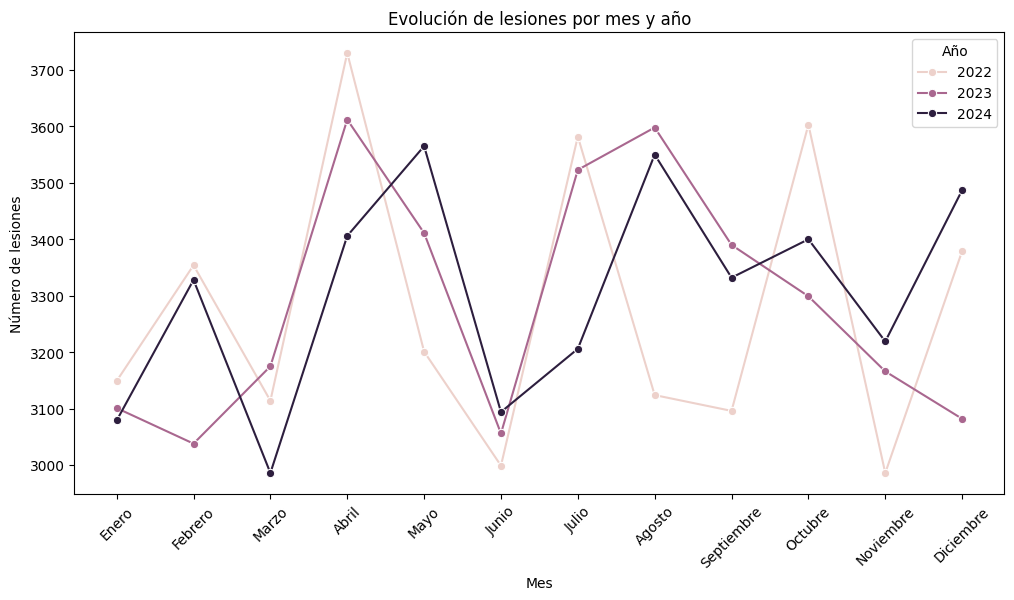

In [37]:
# Gráfico de líneas: Lesiones por mes y año
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_lesionados, x='Month_name', y='Numero_de_lesiones', hue='yy', marker='o')
plt.title('Evolución de lesiones por mes y año')
plt.xlabel('Mes')
plt.ylabel('Número de lesiones')
plt.xticks(rotation=45)
plt.legend(title='Año')
plt.show()

El gráfico de líneas anterior **'Evolución de lesiones por mes y año'**, muestra la evolución del número de lesiones por accidentes de tráfico a lo largo de los meses de los años 2022, 2023 y 2024.
Por cada año se observa lo siguiente:

- **2022 (línea naranja)**: El número de lesiones fluctúa entre 3100 y 3600, siendo el mes de abril el más considerable (alrededor de 3600 lesiones) y un mínimo en junio (cerca de 3100). La misma baja se ve presente en el mes de noviembre del 2022.
- **2023 (línea morada)**: Las lesiones alcanzan su máximo también en el mes de abril (aproximadamente 3700), y un mínimo en febrero, junioy diciembre (alrededor de 3000). Hay otro aumento de accidentes en agosto (cerca de 3600).
- **2024 (línea negra)**: Las lesiones son más estables, fluctuando entre 3100 y 3500. El aumento significativo ocurre en mayo (aproximadamente 3500), mientras que el mínimo se observa en marzo y junio.

**Patrones generales**:
- Abril es un mes con un alto número de lesiones en 2022 y 2023, lo que podría estar relacionado con que existieron más factores involucrados en la incidencia de Accidentes.
- Junio muestra un descenso en lesiones en los tres años.
- 2023 tiene la mayor variabilidad, con aumentos y caídas más pronunciadas, mientras que 2024 es más estable.


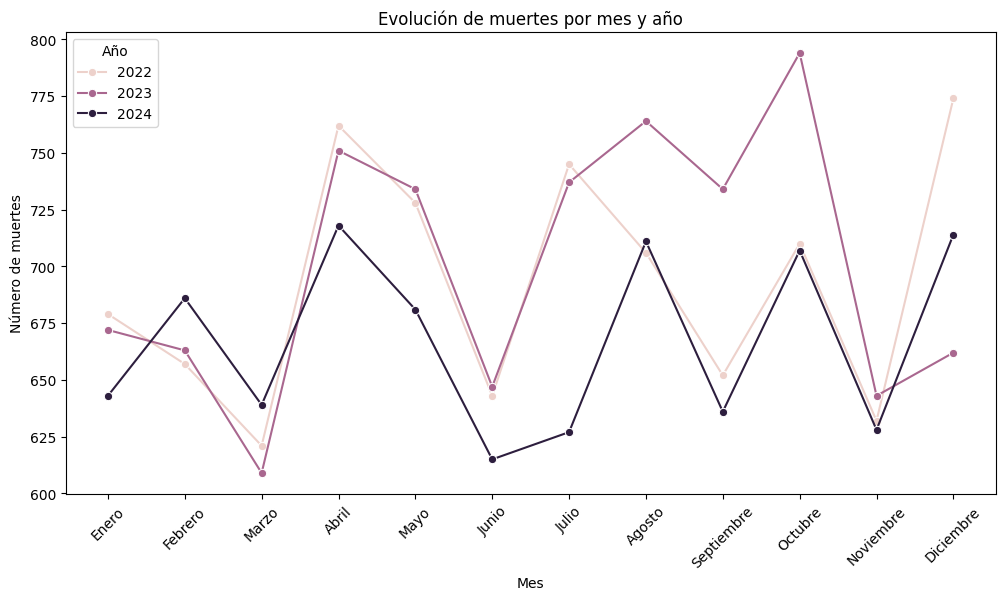

In [38]:
# Gráfico de líneas: Muertes por mes y año
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_fallecidos, x='Month_name', y='Numero_de_muertes', hue='yy', marker='o')
plt.title('Evolución de muertes por mes y año')
plt.xlabel('Mes')
plt.ylabel('Número de muertes')
plt.xticks(rotation=45)
plt.legend(title='Año')
plt.show()

El gráfico de líneas anterior **'Evolución de muertes por mes y año'**, muestra la evolución del número de fallecidos por accidentes de tráfico a lo largo de los meses de los años 2022, 2023 y 2024. Por cada año se observa lo siguiente:

- **2022 (línea naranja)**: El número de fallecidos fluctúa entre 600 y 800, siendo el mes de abril el más considerable (alrededor de 750 fallecidos) y un mínimo en marzo (cerca de 625  fallecidos). La misma baja se ve presente en el mes de noviembre del 2022.
- **2023 (línea morada)**: Los fallecidos alcanzan su máximo en el mes de octubre (aproximadamente 800 fallecidos), y un mínimo en marzo (alrededor de 600).
- **2024 (línea negra)**: La cantidad de fallecidos fluctua entre los 600 y 725 fallecidos. El aumento significativo ocurre en abril (aproximadamente 725 fallecidos), mientras que el mínimo se observa en junio, julio y noviembre del 2024.

**Patrones generales**:
- En el año 2023, existen meses donde existieron lo máximo en cantidad de fallecidos, principalmente octubre.
- 2023 tiene la mayor variabilidad, con aumentos y caídas más pronunciadas, mientras que 2024 es más estable.

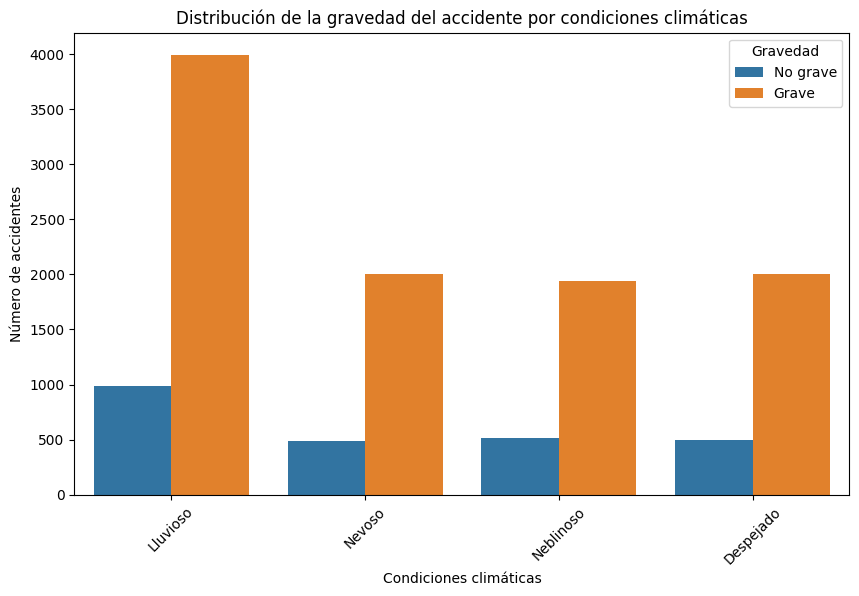

In [40]:
# Gráfico de barras apiladas: Condiciones climáticas vs. Gravedad
plt.figure(figsize=(10, 6))
sns.countplot(data=df_data, x='Condiciones_climaticas', hue='Accidente_Grave')
plt.title('Distribución de la gravedad del accidente por condiciones climáticas')
plt.xlabel('Condiciones climáticas')
plt.ylabel('Número de accidentes')
plt.xticks(rotation=45)
plt.legend(title='Gravedad')
plt.show()

El gráfico de barras apiladas muestra la distribución de la gravedad de los accidentes (menor, moderado, severo) según las condiciones climáticas (lluvioso, ventoso, nevoso, neblinoso, despejado). Las observaciones principales son:

- **Lluvioso**: La mayoría de los accidentes son de gravedad menor (aproximadamente 400), seguidos por moderados (alrededor de 300) y severos (cerca de 100). Esto indica que, aunque los accidentes en días lluviosos son frecuentes, tienden a ser menos graves.
- **Nevoso**: Similar a las condiciones ventosas, los accidentes moderados son los más comunes (aproximadamente 400), con menos casos menores (alrededor de 300) y severos (cerca de 100). La nieve parece tener un impacto similar al viento en términos de gravedad.
- **Neblinoso**: Los accidentes menores son los más frecuentes (alrededor de 400), seguidos por moderados (aproximadamente 300) y severos (cerca de 100). La niebla parece estar asociada con más accidentes menores, posiblemente debido a una conducción más cautelosa.
- **Despejado**: La distribución es similar a las condiciones lluviosas, con una mayor proporción de accidentes menores (aproximadamente 400), seguidos por moderados (alrededor de 300) y severos (cerca de 100).

**Patrones generales**:
- En todas las condiciones climáticas, los accidentes de gravedad menor son los más frecuentes, lo que puede indicar que la mayoría de los accidentes no resultan en daños severos.
- Las condiciones ventosas y nevadas tienen una proporción ligeramente mayor de accidentes moderados en comparación con las otras condiciones, lo que apoya parcialmente la hipótesis de que las condiciones climáticas adversas (lluvioso, nevoso, neblinoso) tienen mayor probabilidad de ser graves.



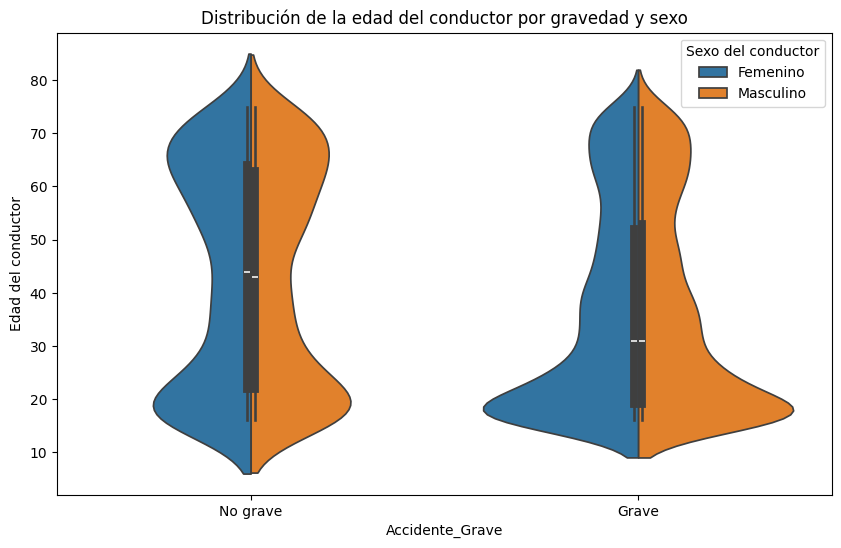

In [41]:
# Gráfico de violín: Distribución de Edad del conductor por Gravedad y Sexo
plt.figure(figsize=(10, 6))
sns.violinplot(
    data=df_data,
    x='Accidente_Grave',
    y='Edad_del_conductor',
    hue='Sexo_del_conductor',
    split=True
)
plt.title('Distribución de la edad del conductor por gravedad y sexo')
plt.xlabel('Accidente_Grave')
plt.ylabel('Edad del conductor')
plt.legend(title='Sexo del conductor')
plt.show()

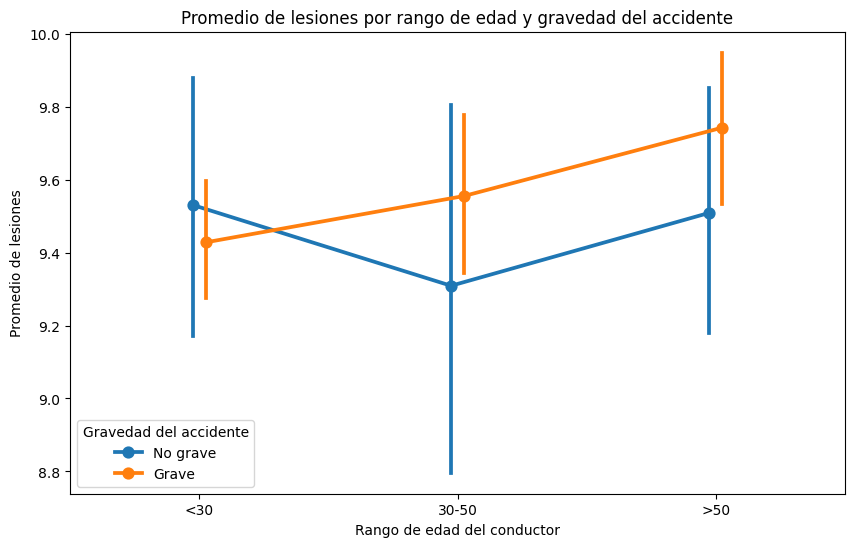

In [42]:
# Gráfico de puntos: Promedio de lesiones por Edad del conductor (binned) y Sexo
# Crear intervalos para Edad_del_conductor
df_data['Edad_binned'] = pd.cut(df_data['Edad_del_conductor'], bins=[0, 30, 50, 100], labels=['<30', '30-50', '>50'])

plt.figure(figsize=(10, 6))
sns.pointplot(
    data=df_data,
    x='Edad_binned',
    y='Numero_de_lesiones',
    hue='Accidente_Grave',
    dodge=True
)
plt.title('Promedio de lesiones por rango de edad y gravedad del accidente')
plt.xlabel('Rango de edad del conductor')
plt.ylabel('Promedio de lesiones')
plt.legend(title='Gravedad del accidente')
plt.show()

In [43]:
# Gráfico de barras agrupadas con Plotly
fig = px.bar(
    df_data.groupby(['Accidente_Grave', 'Sexo_del_conductor'])['Numero_de_lesiones'].mean().reset_index(),
    x='Accidente_Grave',
    y='Numero_de_lesiones',
    color='Sexo_del_conductor',
    barmode='group',
    title='Promedio de lesiones por gravedad y sexo del conductor'
)
fig.update_layout(
    xaxis_title='Gravedad del accidente',
    yaxis_title='Promedio de lesiones',
    legend_title='Sexo del conductor'
)
fig.show()

<Figure size 1000x600 with 0 Axes>

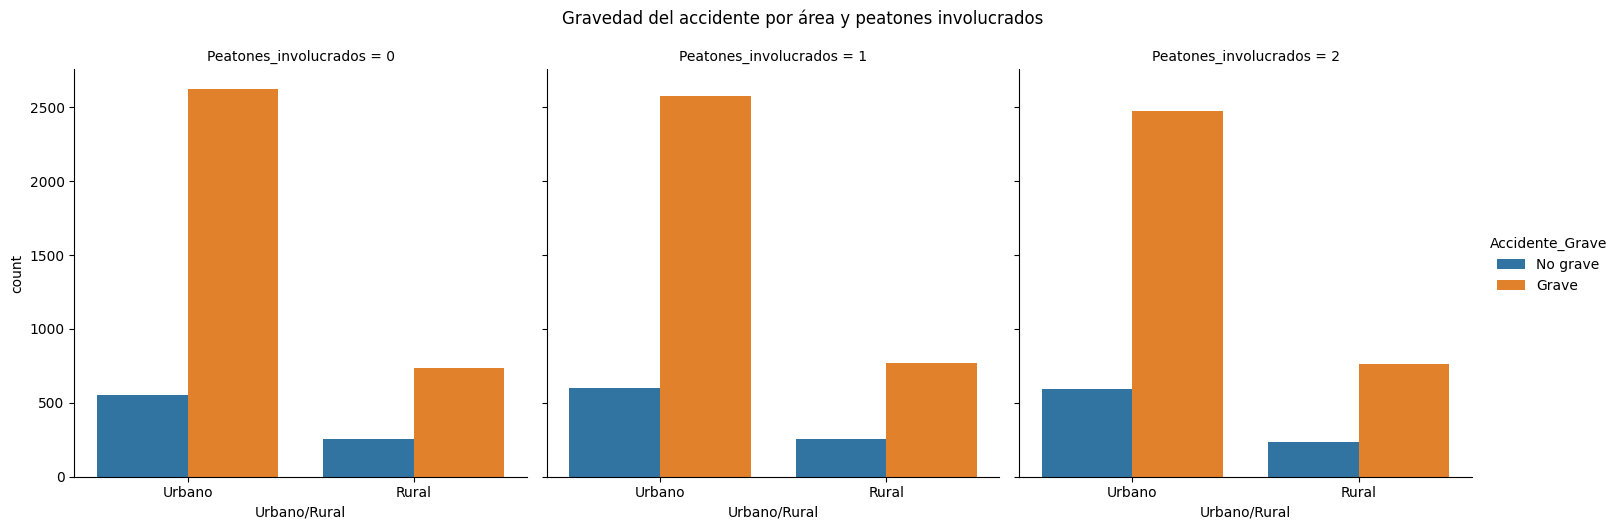

In [44]:
# Gráfico de barras con Seaborn: Urbano/Rural, peatones y gravedad
plt.figure(figsize=(10, 6))
sns.catplot(data=df_data, x='Urbano/Rural', hue='Accidente_Grave',
            col='Peatones_involucrados', kind='count', height=5, aspect=1)
plt.suptitle('Gravedad del accidente por área y peatones involucrados', y=1.05)
plt.show()